# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [147]:
!pip install citipy


In [250]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [251]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [252]:

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    #city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not fou

City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not found. skipping.
City not fou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [253]:

#Creating city dataframe
cities_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
cities_df = city_df.rename_axis('City ID')


#Displaying dataframe
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Carnarvon,40,AU,1614742236,83,-24.8667,113.6333,78.80,13.80
1,Tasiilaq,90,GL,1614742264,39,65.6145,-37.6368,26.60,18.41
2,Safford,1,US,1614742372,15,32.8340,-109.7076,57.20,11.50
3,La Ronge,91,CA,1614742340,79,55.1001,-105.2842,15.80,5.75
4,Punta Arenas,20,CL,1614742218,66,-53.1500,-70.9167,48.20,11.50
...,...,...,...,...,...,...,...,...,...
566,Saint-Joseph,0,RE,1614742644,61,-21.3667,55.6167,78.01,4.61
567,Ridgecrest,75,US,1614742644,13,35.6225,-117.6709,55.99,5.75
568,Solnechnyy,100,RU,1614742644,75,50.7214,136.6319,11.03,7.40


In [254]:
#Exporting data to csv
cities_df.to_csv(r'cities_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [233]:
humidity

[]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

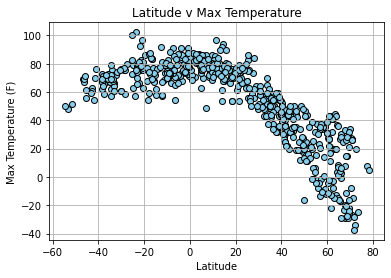

In [257]:
x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('Latitude v Max Temperature')
plt.grid()
plt.show()


###### There is a strong correlation between temperature and latutude. The lo

## Latitude vs. Humidity Plot

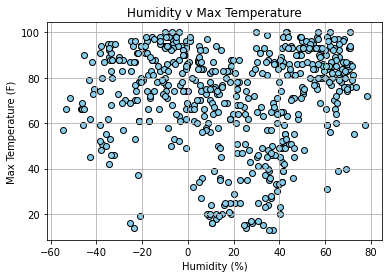

In [258]:
x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Humidity (%)')
plt.title('Humidity v Max Temperature')
plt.grid()

plt.show()


## Latitude vs. Cloudiness Plot

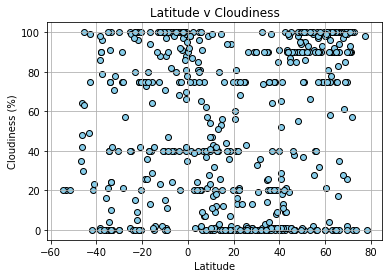

In [259]:
x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude v Cloudiness')
plt.grid()

## Latitude vs. Wind Speed Plot

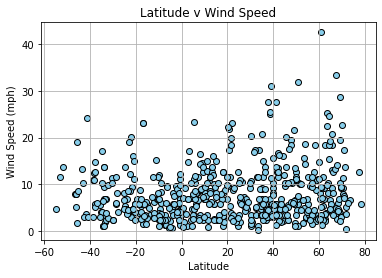

In [260]:
x_axis=cities_df['Lat']
y_axis=cities_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude v Wind Speed')
plt.grid()

plt.show()

## Linear Regression

In [238]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y ='  + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r-')
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color='red')
    plt.xlabel('Latitude')
    print(f'The r-squared is: {rvalue}')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8831051936240056


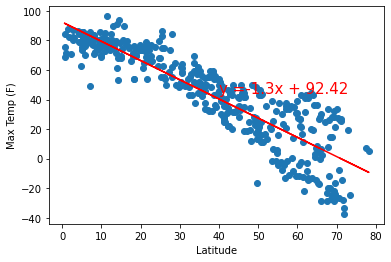

None


In [239]:
n_hemi = city_df.loc[city_df["Lat"]>0]
x_values = n_hemi['Lat']
y_values = n_hemi['Max Temp']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47502203665985704


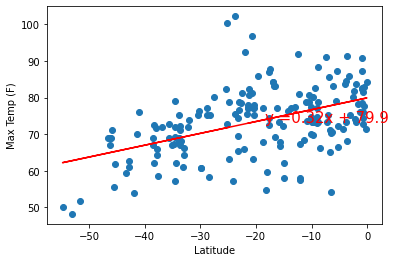

None


In [240]:
s_hemi = city_df.loc[city_df["Lat"]<0]
x_values = s_hemi['Lat']
y_values = s_hemi['Max Temp']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3457821431139163


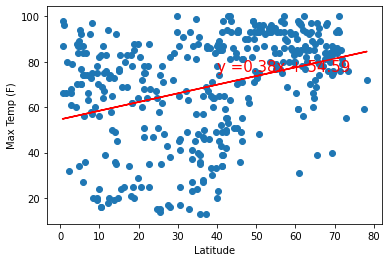

None


In [241]:
n_hemi = city_df.loc[city_df["Lat"]>0]
x_values = n_hemi['Lat']
y_values = n_hemi['Humidity']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3457821431139163


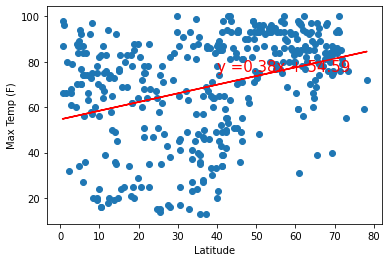

None


In [242]:
s_hemi = city_df.loc[city_df["Lat"]>0]
x_values = s_hemi['Lat']
y_values = s_hemi['Humidity']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34681020035549737


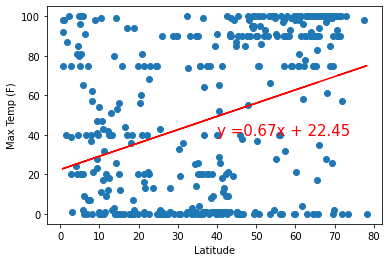

None


In [243]:
n_hemi = city_df.loc[city_df["Lat"]>0]
x_values = n_hemi['Lat']
y_values = n_hemi['Cloudiness']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34681020035549737


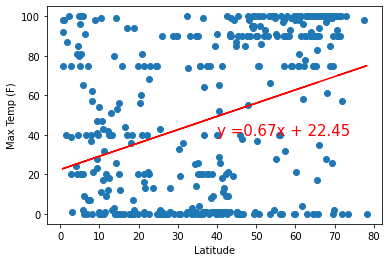

None


In [244]:
s_hemi = city_df.loc[city_df["Lat"]>0]
x_values = s_hemi['Lat']
y_values = s_hemi['Cloudiness']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08228576833269069


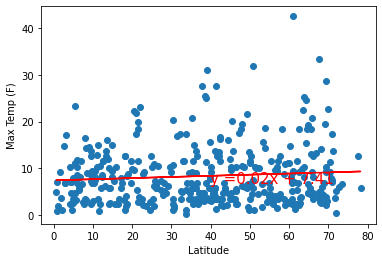

None


In [245]:
n_hemi = city_df.loc[city_df["Lat"]>0]
x_values = n_hemi['Lat']
y_values = n_hemi['Wind Speed']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08228576833269069


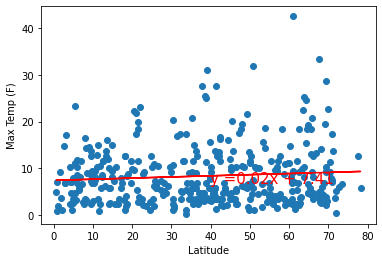

None


In [246]:
s_hemi = city_df.loc[city_df["Lat"]>0]
x_values = s_hemi['Lat']
y_values = s_hemi['Wind Speed']
plt.ylabel('Max Temp (F)')

print(linear_reg_plot(x_values,y_values))